# Prepare environment

In [87]:
import os
import glob
import pandas as pd


curfolder = os.getcwd()

# formants from soundgen
formantfolder1 = curfolder + '/TS_acoustics/'
formants1 = glob.glob(formantfolder1 + 'soundgen*.csv')

# formants from praat
formantfolder2 = curfolder + '/TS_formants/Carignan_formants/'
formants2 = glob.glob(formantfolder2 + '*.Table')

# env 
envfiles = glob.glob(formantfolder1 + '/env_*.csv')

# Prepare formants

In [32]:
# inititate empty df
formants1_df = pd.DataFrame()

# loop over formants 1 and make a giga df from all
for formant in formants1:
    formant_df = pd.read_csv(formant)

    filename = formant.split('\\')[-1]

    # get trialid from the file name (last part separated by /)
    trialid = formant.split('\\')[-1].split('.')[0]
    # get the second-fourth elements separated by _
    trialid = '_'.join(trialid.split('_')[1:4])
    #print(trialid)
    
    # add trialid to the df
    formant_df['trialid'] = trialid

    # add correction info
    if 'c1' in filename:
        formant_df['correction'] = 'c1'
    elif 'c2' in filename:
        formant_df['correction'] = 'c2'
    elif 'c0' in filename:
        formant_df['correction'] = 'c0'
    else:
        formant_df['correction'] = 'none'

    # concatenate
    formants1_df = pd.concat([formants1_df, formant_df])

# get rid of rows with correction = none
formants1_df = formants1_df[formants1_df['correction'] != 'none']

In [33]:
formants1_df

,File,duration,duration_noSilence,time,amEnvDep,amEnvDepVoiced,amEnvFreq,amEnvFreqVoiced,amMsFreq,amMsFreqVoiced,...,roughnessVoiced,specCentroid,specCentroidVoiced,specSlope,specSlopeVoiced,subDep,subRatio,voiced,trialid,correction
0,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.142063,1.30,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_0,c0
1,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.142063,1.30,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_0,c0
2,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.142063,1.30,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_0,c0
3,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.142063,1.30,40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_0,c0
4,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.142063,1.30,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_0,c0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.890188,1.92,3840,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_9,c0
384,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.890188,1.92,3850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_9,c0
385,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.890188,1.92,3860,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_9,c0
386,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,3.890188,1.92,3870,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_9,c0


In [34]:
# inititate empty df
formants2_df = pd.DataFrame()

# loop over formants 2 and make a giga df from all
for formant in formants2:
    formant_df = pd.read_csv(formant, sep='\t')

    # get the name of the file
    filename = os.path.basename(formant)
    # get the name of the file without the extension
    filename = os.path.splitext(filename)[0]

    # add to df
    formant_df['filename'] = filename

    # get trialid from the file name (first, second and fourth parts separated by _)
    trialid = '_'.join(filename.split('_')[0:2] + filename.split('_')[3:4])
    
    # add trialid to the df
    formant_df['trialid'] = trialid

    # in filename, look for c1, c2, c0
    #if c1, c2, c0 in filename, add to df in column correction
    if 'c1' in filename:
        formant_df['correction'] = 'c1'
    elif 'c2' in filename:
        formant_df['correction'] = 'c2'
    elif 'c0' in filename:
        formant_df['correction'] = 'c0'
    else:
        formant_df['correction'] = 'none'
    
    # concatenate
    formants2_df = pd.concat([formants2_df, formant_df])

# get rid of rows with correction = none
formants2_df = formants2_df[formants2_df['correction'] != 'none']

In [35]:
formants2_df

,time,f1,f2,f3,f4,f5,filename,trialid,correction
0,0.026031,1910.072640,3380.992452,5896.442699,0.000000,0.0,0_2_pr_0_Mic_nominal_srate48000_p0_juichen_com...,0_2_0,c0
1,0.031031,1890.080560,3366.165092,5896.610205,0.000000,0.0,0_2_pr_0_Mic_nominal_srate48000_p0_juichen_com...,0_2_0,c0
2,0.036031,1910.066181,3380.974399,5896.442306,0.000000,0.0,0_2_pr_0_Mic_nominal_srate48000_p0_juichen_com...,0_2_0,c0
3,0.041031,1890.092319,3366.156404,5896.609863,0.000000,0.0,0_2_pr_0_Mic_nominal_srate48000_p0_juichen_com...,0_2_0,c0
4,0.046031,1910.073207,3380.962077,5896.441999,0.000000,0.0,0_2_pr_0_Mic_nominal_srate48000_p0_juichen_com...,0_2_0,c0
...,...,...,...,...,...,...,...,...,...
764,3.845094,1202.145193,2677.120107,3462.971486,4242.887083,0.0,0_2_trial_9_Mic_nominal_srate48000_p0_kauwen_c...,0_2_9,c0
765,3.850094,1153.462121,2643.443828,3413.342886,4186.828808,0.0,0_2_trial_9_Mic_nominal_srate48000_p0_kauwen_c...,0_2_9,c0
766,3.855094,1872.584496,2910.335231,3811.651235,0.000000,0.0,0_2_trial_9_Mic_nominal_srate48000_p0_kauwen_c...,0_2_9,c0
767,3.860094,1910.069175,3380.886596,5896.354326,0.000000,0.0,0_2_trial_9_Mic_nominal_srate48000_p0_kauwen_c...,0_2_9,c0


# Comparison

In [43]:
formants1_trial

,File,duration,duration_noSilence,time,amEnvDep,amEnvDepVoiced,amEnvFreq,amEnvFreqVoiced,amMsFreq,amMsFreqVoiced,...,roughness,roughnessVoiced,specCentroid,specCentroidVoiced,specSlope,specSlopeVoiced,subDep,subRatio,voiced,trialid
0,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
1,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
2,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
3,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
4,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,7820,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
782,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,7830,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
783,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,7840,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7
784,C:/Users/Sarka Kadava/Documents/Github/FLESH_C...,7.873125,1.63,7850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0_2_7


In [42]:
formants2_trial

,time,f1,f2,f3,f4,f5,filename,trialid
0,0.026562,766.259524,2440.622317,3398.968770,4482.503724,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
1,0.031562,1582.193917,2616.481190,3637.343301,4683.572412,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
2,0.036562,1586.469073,2622.146376,3645.136801,4693.197220,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
3,0.041562,1586.400246,2621.597314,3644.114517,4691.734685,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
4,0.046562,1568.946555,2590.121209,3593.524864,4613.707245,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
...,...,...,...,...,...,...,...,...
1560,7.826562,1152.894824,2183.356086,3506.057643,4722.659187,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
1561,7.831563,1156.937658,2256.371995,3547.379742,4823.157997,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
1562,7.836563,1176.588533,2340.171091,3592.513009,4884.634233,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7
1563,7.841563,1167.976070,2339.766158,3592.018121,4958.992652,0.0,0_2_trial_7_Mic_nominal_srate48000_p0_verbrand...,0_2_7


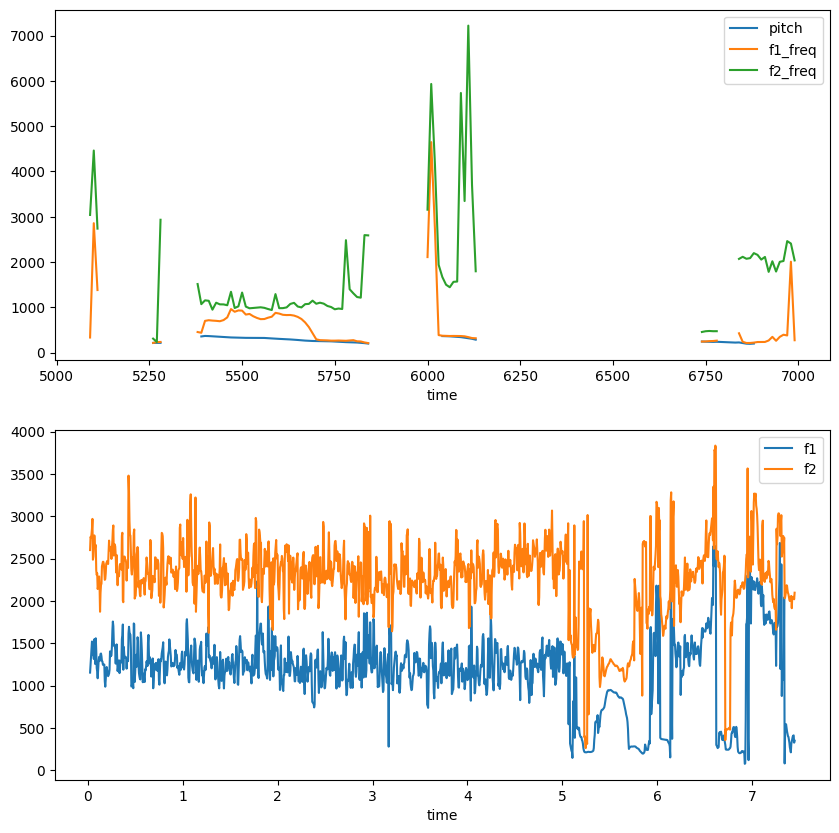

In [80]:
import matplotlib.pyplot as plt

# pick a random trialid from formants1_df
trialid = formants1_df['trialid'].sample(1).values[0]

# get the formants for this trialid from both dfs
formants1_trial = formants1_df[formants1_df['trialid'] == trialid]
formants2_trial = formants2_df[formants2_df['trialid'] == trialid]

# plot the formants as time series, as two grids from each df
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

formants1_trial.plot(x='time', y=['pitch', 'f1_freq', 'f2_freq'], ax=axs[0])
formants2_trial.plot(x='time', y=['f1', 'f2'], ax=axs[1])

# limit y-axis from 2 to 6
#axs[0].set_xlim(1, 6)
#axs[1].set_xlim(1000, 6000)

plt.show()

# Soundgen formants space

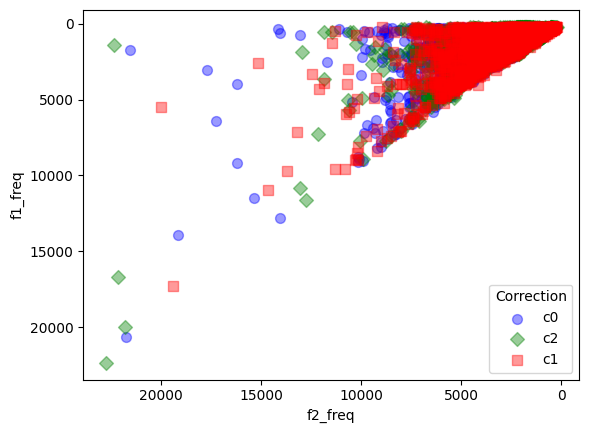

In [81]:
import matplotlib.pyplot as plt

# Define the color and shape mapping for each unique correction
color_mapping = {'c0': 'blue', 'c1': 'red', 'c2': 'green'}
shape_mapping = {'c0': 'o', 'c1': 's', 'c2': 'D'}  # 'o' = circle, 's' = square, 'D' = diamond

# Create the plot
for correction in formants1_df['correction'].unique():
    subset = formants1_df[formants1_df['correction'] == correction]
    plt.scatter(subset['f2_freq'], subset['f1_freq'],
                color=color_mapping[correction],
                marker=shape_mapping[correction],
                s=50,
                label=correction,
                alpha=0.4)

# limit the x and y axis
# plt.xlim(0, 3000)
# plt.ylim(0, 1800)

# Reverse axes
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Labels
plt.xlabel('f2_freq')
plt.ylabel('f1_freq')



# Add legend for colors and shapes
plt.legend(title="Correction")
plt.show()


# Praat formants space


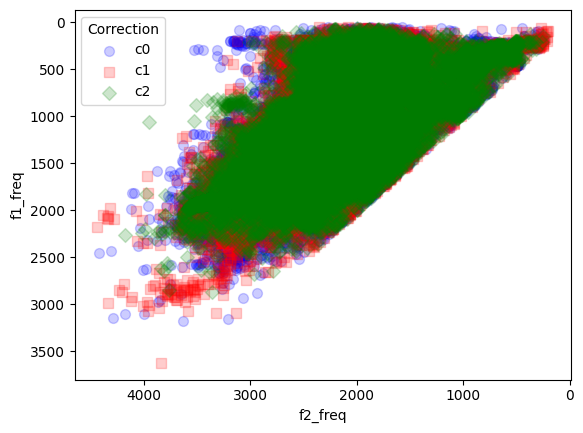

In [82]:
import matplotlib.pyplot as plt

# Define the color and shape mapping for each unique correction
color_mapping = {'c0': 'blue', 'c1': 'red', 'c2': 'green'}
shape_mapping = {'c0': 'o', 'c1': 's', 'c2': 'D'}  # 'o' = circle, 's' = square, 'D' = diamond

# Create the plot
for correction in formants2_df['correction'].unique():
    subset = formants2_df[formants2_df['correction'] == correction]
    plt.scatter(subset['f2'], subset['f1'],
                color=color_mapping[correction],
                marker=shape_mapping[correction],
                s=50,
                label=correction,
                alpha=0.2)

# # limit the x and y axis
# plt.xlim(0, 3000)
# plt.ylim(0, 1800)

# Reverse axes
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Labels
plt.xlabel('f2_freq')
plt.ylabel('f1_freq')



# Add legend for colors and shapes
plt.legend(title="Correction")
plt.show()


# Distribution

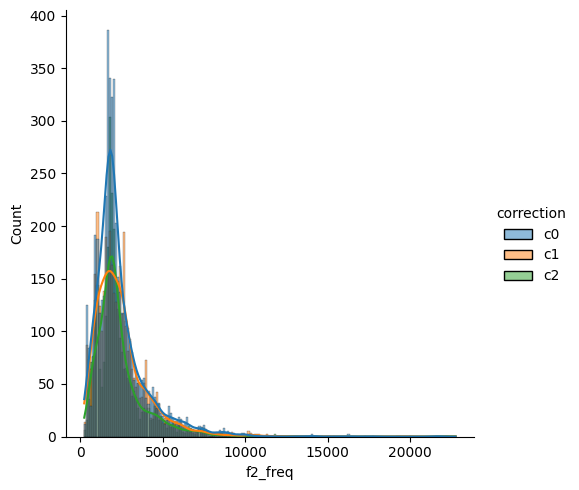

In [83]:
import seaborn as sns

# correction as factor
formants1_df['correction'] = pd.Categorical(formants1_df['correction'])

# reset index
df_results = formants1_df.reset_index(drop=True)

# plot desnity of f1_freq , each correction separately
sns.displot(data=df_results, x='f2_freq', hue='correction', fill=True, kde=True)

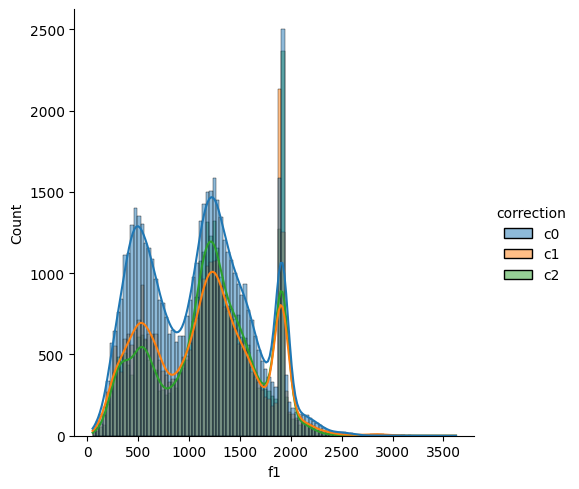

In [86]:
import seaborn as sns

# correction as factor
formants2_df['correction'] = pd.Categorical(formants2_df['correction'])

# reset index
df_results = formants2_df.reset_index(drop=True)

# plot desnity of f1_freq , each correction separately
sns.displot(data=df_results, x='f1', hue='correction', fill=True, kde=True)

# Envelope peaks as a reference point for formants

In [91]:
env_df = pd.DataFrame()

# loop over env files and make a giga df from all
for envfile in envfiles:
    df = pd.read_csv(envfile)
    env_df = pd.concat([env_df, df])

In [93]:
# in the trialID column, get rid of the last element separated by _
env_df['trialid'] = env_df['trialID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# get rid of the trialID column
env_df = env_df.drop(columns=['trialID'])

In [98]:
env_trial

,time,audio,envelope,envelope_change,trialid
0,0.000000,0.0,0.022912,1.398155e-10,0_2_27
1,0.020833,0.0,0.022912,1.432049e-10,0_2_27
2,0.041667,0.0,0.022912,1.465938e-10,0_2_27
3,0.062500,0.0,0.022912,1.499821e-10,0_2_27
4,0.083333,0.0,0.022912,1.533699e-10,0_2_27
...,...,...,...,...,...
282250,5880.208333,0.0,0.022913,3.745155e-10,0_2_27
282251,5880.229167,0.0,0.022913,3.745154e-10,0_2_27
282252,5880.250000,0.0,0.022913,3.745154e-10,0_2_27
282253,5880.270833,0.0,0.022913,3.745154e-10,0_2_27


In [119]:
# pick a random trialid from env_df
trialid = env_df['trialid'].sample(1).values[0]

# get the env for this trialid from env_df
env_trial = env_df[env_df['trialid'] == trialid]

In [129]:
env_trial

,time,audio,envelope,envelope_change,trialid
0,0.000000,0.0,0.009676,-4.201881e-10,0_2_6
1,0.020833,0.0,0.009676,-4.184959e-10,0_2_6
2,0.041667,0.0,0.009676,-4.168040e-10,0_2_6
3,0.062500,0.0,0.009676,-4.151124e-10,0_2_6
4,0.083333,0.0,0.009676,-4.134212e-10,0_2_6
...,...,...,...,...,...
253811,5287.729167,0.0,0.009673,1.343268e-06,0_2_6
253812,5287.750000,0.0,0.009673,1.343290e-06,0_2_6
253813,5287.770833,0.0,0.009673,1.343309e-06,0_2_6
253814,5287.791667,0.0,0.009673,1.343326e-06,0_2_6


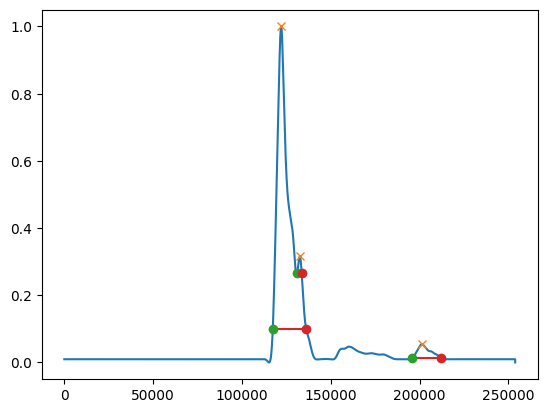

In [120]:
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths

# find peaks, min height is mean of the env
peaks, _ = find_peaks(env_trial['envelope'], height=np.mean(env_trial['envelope']))

# get the width of the peaks
results_half = peak_widths(env_trial['envelope'], peaks, rel_height=0.5)
results_full = peak_widths(env_trial['envelope'], peaks, rel_height=0.9)

# plot the env as time series
plt.plot(env_trial['envelope'])
# plot the peaks
plt.plot(peaks, env_trial['envelope'][peaks], "x")
# plot the width of the peaks
#plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
# plot the start and end of the peaks
plt.plot(results_full[2], env_trial['envelope'][results_full[2].astype(int)], "o")
plt.plot(results_full[3], env_trial['envelope'][results_full[3].astype(int)], "o")

plt.show()




In [130]:
formants2_trial

,time,f1,f2,f3,f4,f5,filename,trialid,correction
0,0.026406,1491.029926,2545.805665,3592.133770,4765.947291,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
1,0.031406,1390.397559,2495.867098,3876.361324,4778.688338,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
2,0.036406,1432.736635,2500.801721,4007.375377,4753.318133,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
3,0.041406,1454.512902,2516.808749,4096.174575,4713.633566,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
4,0.046406,1395.082860,2535.667830,4264.081835,4626.411581,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
...,...,...,...,...,...,...,...,...,...
1043,5.241406,1899.544633,3373.227495,5896.524803,0.000000,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
1044,5.246406,1899.325884,3373.092339,5896.525810,0.000000,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
1045,5.251406,1899.500480,3373.225609,5896.524292,0.000000,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1
1046,5.256406,1899.308772,3373.102607,5896.525532,0.000000,0.0,0_2_trial_6_Mic_nominal_srate48000_p0_verbrand...,0_2_6,c1


In [163]:
# find formants2 df with the same trialid
formants2_trial = formants2_df[formants2_df['trialid'] == trialid]

# convert time to ms
formants2_trial['time'] = formants2_trial['time'] * 1000

# merge formants1 and formants2 on trialid and time, outer method
merged_df = pd.merge(env_trial, formants2_trial, on=['trialid', 'time'], how='outer')


# cols to int
colstoint = ['f1', 'f2', 'f3', 'f4', 'f5']

# interpolate f1-f5 on time
# interpolate 
for col in colstoint:
    merged_df[col] = merged_df[col].interpolate(method='linear', x = merged_df['time'])

# delete rows where envelope is NaN
merged_df = merged_df.dropna(subset=['envelope'])


C:\Users\kadava\AppData\Local\Temp\ipykernel_18092\3388615306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formants2_trial['time'] = formants2_trial['time'] * 1000


In [168]:
results_half[2]

array([117365.57700355, 131095.17705004, 195988.61450098])

In [169]:
results_half

(array([18795.28867794,  2557.35436326, 15963.6071883 ]),
 array([0.1       , 0.26509456, 0.01357464]),
 array([117365.57700355, 131095.17705004, 195988.61450098]),
 array([136160.86568149, 133652.5314133 , 211952.22168928]))

In [170]:
merged_df

,time,audio,envelope,envelope_change,trialid,f1,f2,f3,f4,f5,filename,correction,peak_width
0,0.000000,0.0,0.009676,-4.201881e-10,0_2_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.020833,0.0,0.009676,-4.184959e-10,0_2_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.041667,0.0,0.009676,-4.168040e-10,0_2_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.062500,0.0,0.009676,-4.151124e-10,0_2_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.083333,0.0,0.009676,-4.134212e-10,0_2_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254859,5287.729167,0.0,0.009673,1.343268e-06,0_2_6,1899.51248,3373.237149,5896.524277,0.0,0.0,NaN,NaN,0
254860,5287.750000,0.0,0.009673,1.343290e-06,0_2_6,1899.51248,3373.237149,5896.524277,0.0,0.0,NaN,NaN,0
254861,5287.770833,0.0,0.009673,1.343309e-06,0_2_6,1899.51248,3373.237149,5896.524277,0.0,0.0,NaN,NaN,0
254862,5287.791667,0.0,0.009673,1.343326e-06,0_2_6,1899.51248,3373.237149,5896.524277,0.0,0.0,NaN,NaN,0


In [180]:
# check the width of the peaks

# find peaks, min height is mean of the env
peaks, _ = find_peaks(merged_df['envelope'], height=np.mean(merged_df['envelope']))

# get the width of the peaks
results_half = peak_widths(merged_df['envelope'], peaks, rel_height=0.9)

# create column peak_width and put 1 everywhere between start and end of the peak
merged_df['peak_width'] = 0

# create a table from the results_half[2] and results_half[3]

peak_w = pd.DataFrame({'start': results_half[2], 'end': results_half[3]})

# loop over the rows of the peak_w and put 1 in the peak_width column between start and end
for i, row in peak_w.iterrows():
    merged_df.loc[row['start']:row['end'], 'peak_width'] = 1


# for each formant column, create new f_clean column and put the value of the formant where peak_width = 1
for col in colstoint:
    merged_df[col + '_clean'] = merged_df[col] * merged_df['peak_width']
    # instead of 0, put NaN
    merged_df[col + '_clean'] = merged_df[col + '_clean'].replace(0, np.nan)


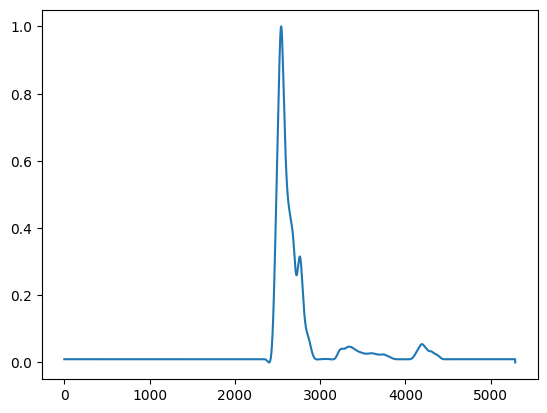

In [176]:
# plot env with time
plt.plot(merged_df['time'], merged_df['envelope'])


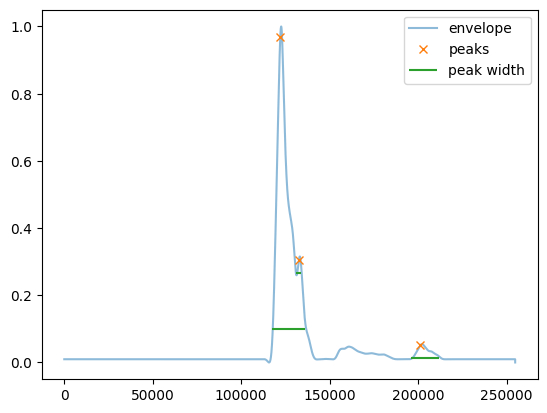

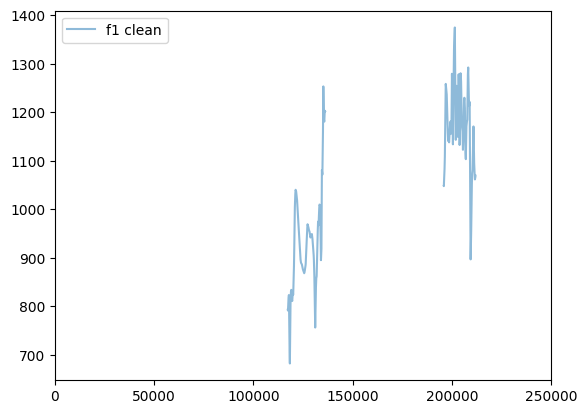

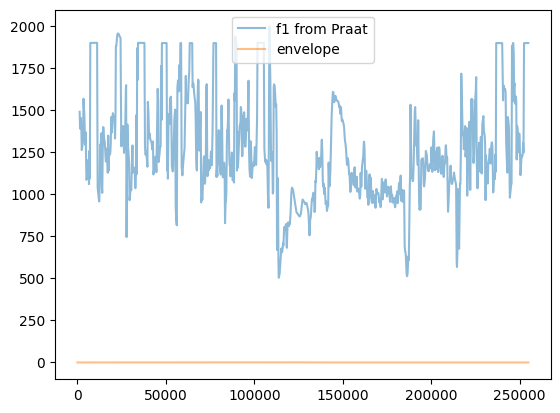

In [184]:
# plot env
plt.plot(merged_df['envelope'], label='envelope', alpha=0.5)
# plot peaks
plt.plot(peaks, merged_df['envelope'][peaks], "x", label='peaks')
# plot the width of the peaks
plt.hlines(*results_half[1:], color="C2", label='peak width')


plt.legend()
plt.show()

# plot f1 from merged df and from formatns2 df
plt.plot(merged_df['f1_clean'], label='f1 clean', alpha=0.5)
plt.legend()
# plot from 0 to 250000
plt.xlim(0, 250000)
plt.show()

# plot f1 from merged df and from formatns2 df
plt.plot(merged_df['f1'], label='f1 from Praat', alpha=0.5)
plt.plot(merged_df['envelope'], label='f1 clean', alpha=0.5)
plt.legend()
plt.show()

#

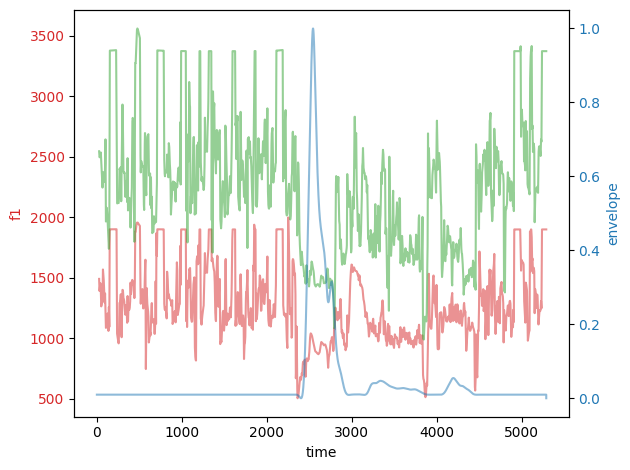

In [187]:
# plot f1 and envelope such that each has its own y-axis

fig, ax1 = plt.subplots()

color = 'tab:red'
color1 = 'tab:green'
ax1.set_xlabel('time')
ax1.set_ylabel('f1', color=color)

ax1.plot(merged_df['time'], merged_df['f1'], color=color, alpha=0.5)
ax1.plot(merged_df['time'], merged_df['f2'], color=color1, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'

ax2.set_ylabel('envelope', color=color)
ax2.plot(merged_df['time'], merged_df['envelope'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


1) formants are most reliable where f0 is present
2) but we are working with non-speech sounds (non-voiced), so we also take into account the envelope peaks width
- this maximize the number of data
- taking only where f0 is does not make sense - there are formants in, eg., breathing noises (REF to Werner)
- we will check overlap 

# Notes

- should we delete formants where there is no f0?

formants without f0 might make sense (breathing noise)

- to consider: formants in the envelope peaks
- plot bandwidth of the formants as histogram
- chris car. - praat script for f5 formants - check
- vocal space for speech vs. vocalizations - Anakin's paper
- ask Anikin on soundgen's parameters
